<center>
    <h1><b>K-Means Clustering</b></h1>
</center>

This is an unsupervised machine learning algorithm for detecting patterns

Centroid

Elbow Technique

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

%matplotlib inline

In [35]:
import os

# Set the environment variable to avoid memory leak on Windows
os.environ['OMP_NUM_THREADS'] = '1'


In [13]:
data = {'name': ['Rob','Michael','Mohan','Ismail','Kory','Gautam','David','Andrea','Brad','Angelina',
                'Donald','Tom', 'Arnold','Jared','Stark','Ranbir','Dipika','Priyanka','Nick','Alia','Sid','Abdul'],
       'age': [27, 29, 29, 28, 42, 39, 41, 38, 36, 35, 37, 26, 27, 28, 29, 32, 40, 41, 43, 39, 41, 39],
       'income': [70000, 90000, 61000, 60000, 150000, 155000, 160000, 162000, 156000, 130000, 137000, 45000,
                 48000, 51000, 49500, 53000, 65000, 63000, 64000, 80000, 82000, 58000]}

In [14]:
df = pd.DataFrame(data)

In [15]:
df.head()

,name,age,income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


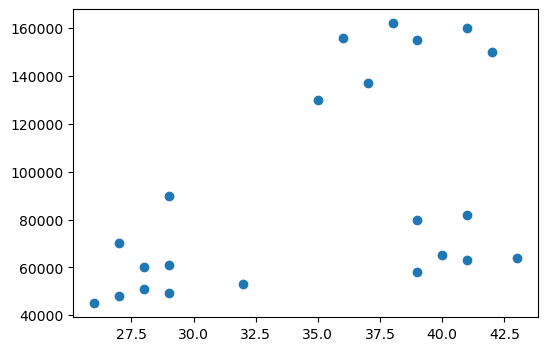

In [20]:
plt.figure(figsize = [6,4])
plt.scatter(df['age'], df['income']);

In [21]:
kmeans = KMeans(n_clusters = 3)
kmeans

KMeans(n_clusters=3)

In [22]:
y_predicted = kmeans.fit_predict(df[['age', 'income']])
y_predicted

C:\Users\Banji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Banji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [23]:
df['cluster'] = y_predicted

In [24]:
df.head()

,name,age,income,cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [25]:
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


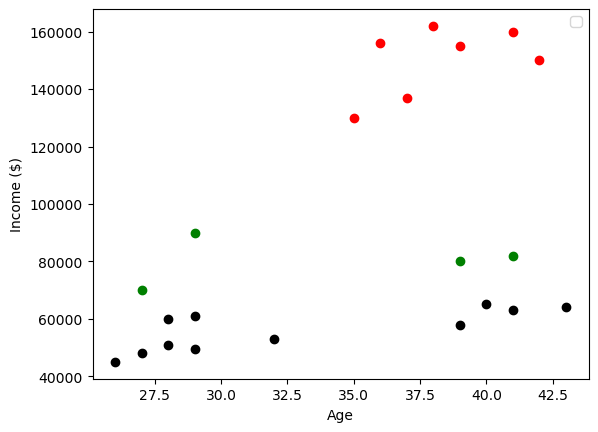

In [27]:
plt.scatter(df1['age'], df1['income'], color = 'g')
plt.scatter(df2['age'], df2['income'], color = 'r')
plt.scatter(df3['age'], df3['income'], color = 'black')

#plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_center_[:,1], color = 'purple', marker ='*', label = 'centroid')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend();

In [28]:
scaler = MinMaxScaler()

In [30]:
scaler.fit(df[['income']])
df['income'] = scaler.transform(df[['income']])

scaler.fit(df[['age']])
df['age'] = scaler.transform(df[['age']])
df.head( )

,name,age,income,cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [36]:
km = KMeans(n_clusters = 3, n_init = 10)
y_predicted = km.fit_predict(df[['age', 'income']])
y_predicted 

C:\Users\Banji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [37]:
df['cluster'] = y_predicted

In [38]:
df.head()

,name,age,income,cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [39]:
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]

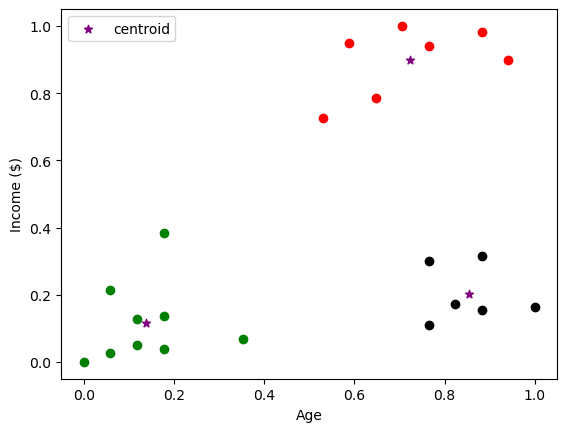

In [44]:
plt.scatter(df1['age'], df1['income'], color = 'g')
plt.scatter(df2['age'], df2['income'], color = 'r')
plt.scatter(df3['age'], df3['income'], color = 'black')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'purple', marker ='*', label = 'centroid')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend();

In [43]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

## Elbow Plot Method

To handle data that the umber of clusters cannot be determined easily.

In [50]:
k_rng = range(1, 10)
sse = []  # sum of square error
for k in k_rng:
    km = KMeans(n_clusters = k, n_init = 10)
    km.fit(df[['age', 'income']])
    sse.append(km.inertia_)

C:\Users\Banji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Banji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Banji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Banji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

In [51]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.26640301246684156,
 0.21055478995472496,
 0.1685851223602976,
 0.13781880133764024,
 0.10497488680620909]

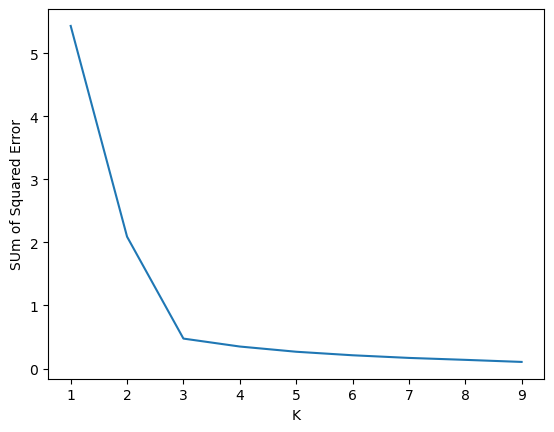

In [52]:
plt.xlabel('K')
plt.ylabel('SUm of Squared Error')
plt.plot(k_rng, sse);